In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Incomplete payment dataset.csv")
df = df.drop(columns=['MARK'])

df.head()

,y,t,p,Alpha
0,0.9,0,8,3
1,0.9,0,7,3
2,0.9,0,7,3
3,0.9,2,6,6
4,0.9,3,5,6


In [4]:
scaler = StandardScaler()

In [6]:
df[['y_T', 't_T', 'p_T', 'Alpha_T']] = scaler.fit_transform(df[['y', 't', 'p', 'Alpha']])
df

,y,t,p,Alpha,y_T,Alpha_T,t_T,p_T
0,0.9,0,8,3,1.468947,-0.728759,-0.997060,3.335404
1,0.9,0,7,3,1.468947,-0.728759,-0.997060,2.714281
2,0.9,0,7,3,1.468947,-0.728759,-0.997060,2.714281
3,0.9,2,6,6,1.468947,0.778447,-0.083646,2.093159
4,0.9,3,5,6,1.468947,0.778447,0.373061,1.472037
...,...,...,...,...,...,...,...,...
268,0.1,2,2,3,-1.828258,-0.728759,-0.083646,-0.391330
269,0.1,0,2,3,-1.828258,-0.728759,-0.997060,-0.391330
270,0.1,1,2,3,-1.828258,-0.728759,-0.540353,-0.391330
271,0.1,0,2,3,-1.828258,-0.728759,-0.997060,-0.391330


In [7]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1 , max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(5, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
                

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


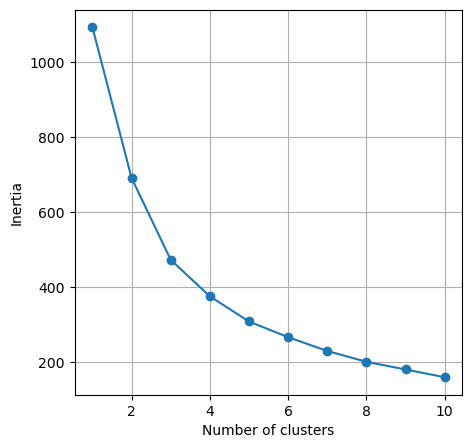

In [8]:
optimise_k_means(df[['y_T', 't_T', 'p_T', 'Alpha_T']], 11)

In [9]:
kmeans = KMeans(n_clusters = 5)

In [10]:
kmeans.fit(df[['y_T', 't_T', 'p_T', 'Alpha_T']])

KMeans(n_clusters=5)

In [11]:
df['kmeans_5'] = kmeans.labels_
df

,y,t,p,Alpha,y_T,Alpha_T,t_T,p_T,kmeans_5
0,0.9,0,8,3,1.468947,-0.728759,-0.997060,3.335404,0
1,0.9,0,7,3,1.468947,-0.728759,-0.997060,2.714281,0
2,0.9,0,7,3,1.468947,-0.728759,-0.997060,2.714281,0
3,0.9,2,6,6,1.468947,0.778447,-0.083646,2.093159,0
4,0.9,3,5,6,1.468947,0.778447,0.373061,1.472037,3
...,...,...,...,...,...,...,...,...,...
268,0.1,2,2,3,-1.828258,-0.728759,-0.083646,-0.391330,4
269,0.1,0,2,3,-1.828258,-0.728759,-0.997060,-0.391330,4
270,0.1,1,2,3,-1.828258,-0.728759,-0.540353,-0.391330,4
271,0.1,0,2,3,-1.828258,-0.728759,-0.997060,-0.391330,4


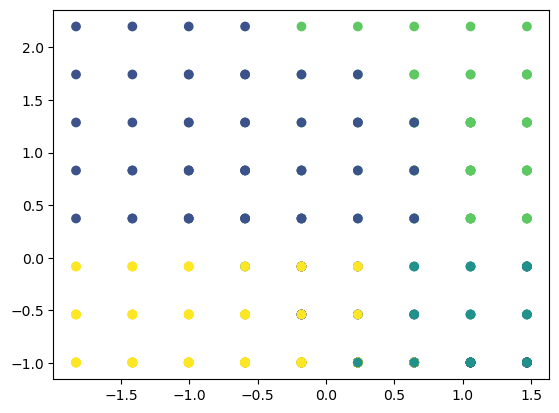

[[0.6825     0.425      5.75       3.15      ]
 [0.36521739 4.58695652 1.80434783 3.26086957]
 [0.70238095 1.07142857 1.61904762 6.71428571]
 [0.77413793 4.68965517 2.22413793 6.82758621]
 [0.34367816 0.5862069  2.3908046  3.        ]]


In [12]:
plt.scatter(x=df['y_T'], y=df['t_T'],  c=df['kmeans_5'])

plt.show()
inversed = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed)


In [16]:
for k in range(1 , 7):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['y_T', 't_T', 'p_T', 'Alpha_T']])
    df[f'KMeans_{k}'] = kmeans.labels_
    

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [17]:
df

,y,t,p,Alpha,y_T,Alpha_T,t_T,p_T,kmeans_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,0.9,0,8,3,1.468947,-0.728759,-0.997060,3.335404,0,0,0,1,3,2,5
1,0.9,0,7,3,1.468947,-0.728759,-0.997060,2.714281,0,0,0,1,3,2,5
2,0.9,0,7,3,1.468947,-0.728759,-0.997060,2.714281,0,0,0,1,3,2,5
3,0.9,2,6,6,1.468947,0.778447,-0.083646,2.093159,0,0,1,1,3,2,5
4,0.9,3,5,6,1.468947,0.778447,0.373061,1.472037,3,0,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.1,2,2,3,-1.828258,-0.728759,-0.083646,-0.391330,4,0,0,0,0,4,1
269,0.1,0,2,3,-1.828258,-0.728759,-0.997060,-0.391330,4,0,0,0,0,4,1
270,0.1,1,2,3,-1.828258,-0.728759,-0.540353,-0.391330,4,0,0,0,0,4,1
271,0.1,0,2,3,-1.828258,-0.728759,-0.997060,-0.391330,4,0,0,0,0,4,1


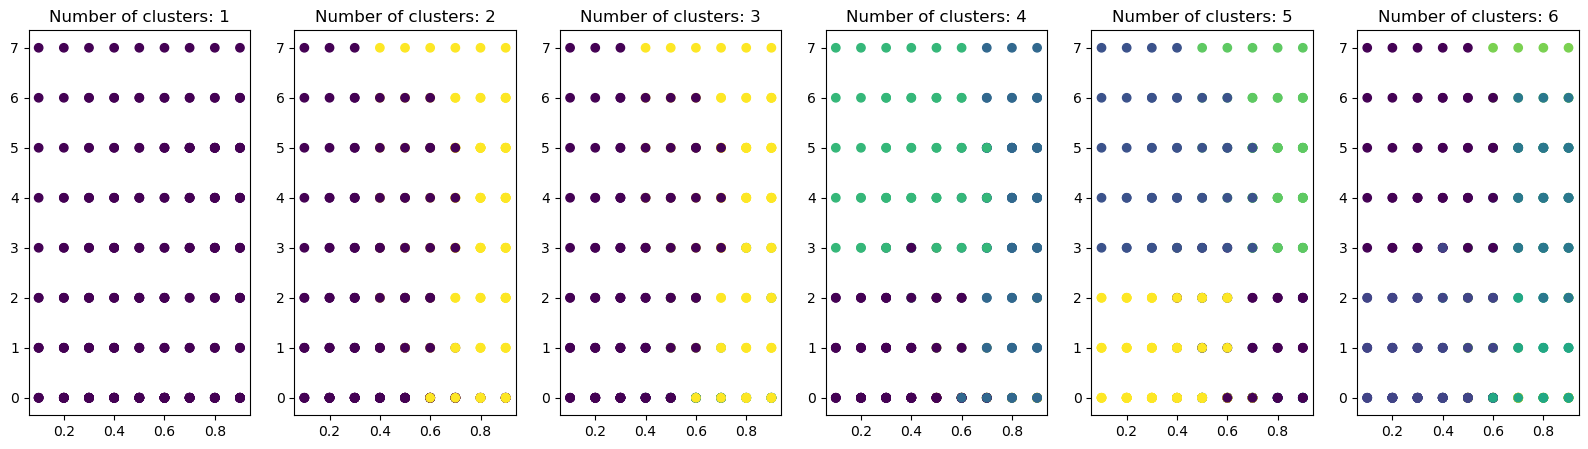

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['y'], y=df['t'],   c=df[f'KMeans_{i}'])
    ax.set_title(f'Number of clusters: {i}')